**PROJECT ONE**

Following steps for project:

1.Data Collection

*   Identify dataset
*   Load dataset
2.Data Cleaning and preprocessing

*   Inspect the dataset
*   Handle missing values
*   Transform dataset
3.Exploratory data analysis(EDA)


*   Statistical data
*   Data visualization & analysis


Data from API:
{'get': 'countries', 'parameters': [], 'errors': [], 'results': 231, 'response': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua-and-Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia-and-Herzegovina', 'Botswana', 'Brazil', 'British-Virgin-Islands', 'Brunei', 'Bulgaria', 'Burkina-Faso', 'Burundi', 'Cabo-Verde', 'Cambodia', 'Cameroon', 'Canada', 'CAR', 'Caribbean-Netherlands', 'Cayman-Islands', 'Chad', 'Channel-Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook-Islands', 'Costa-Rica', 'Croatia', 'Cuba', 'Cura&ccedil;ao', 'Cyprus', 'Czechia', 'Denmark', 'Diamond-Princess', 'Djibouti', 'Dominica', 'Dominican-Republic', 'DPRK', 'DRC', 'Ecuador', 'Egypt', 'El-Salvador', 'Equatorial-Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faeroe-Islands', 'Falkland-Islands', 

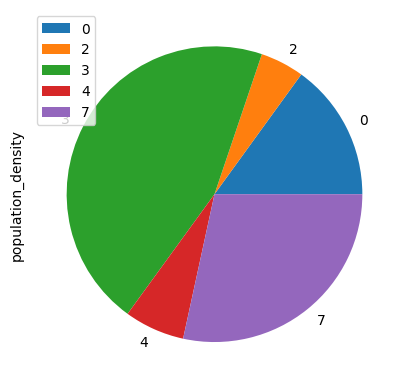

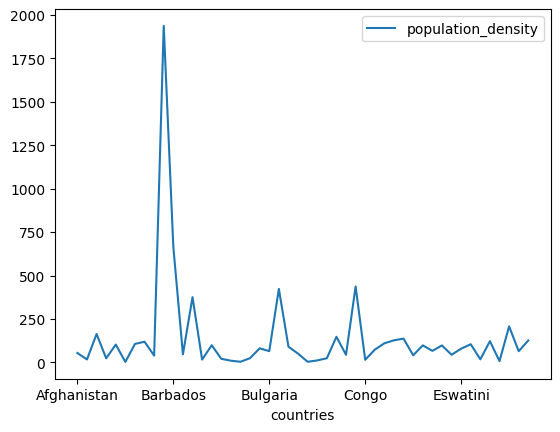

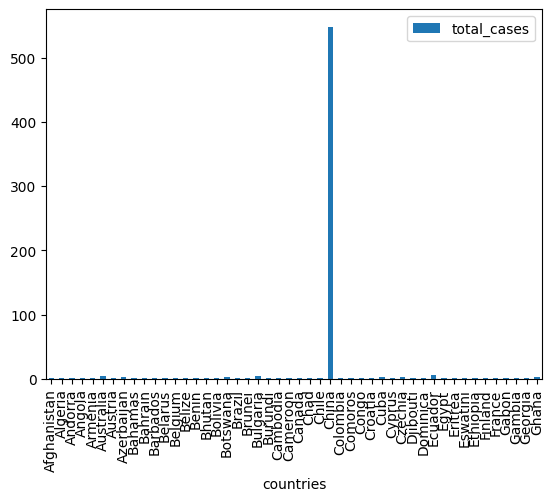

In [8]:
#Data Collection

#identify datasets
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://covid-193.p.rapidapi.com/countries"
headers = {
	"x-rapidapi-key": "5c064a8188msh3196a9b3cafe7dfp1828ffjsn7d30682120ff",
	"x-rapidapi-host": "covid-193.p.rapidapi.com"
}
response = requests.get(url, headers=headers)
print("Data from API:")
print(response.json())

#load dataset
if response.status_code==200:
  data=response.json()
  new=data['response']
  df=pd.DataFrame(new, columns=['countries'])
  df2 = pd.read_csv('covid.csv', usecols=['location', 'total_cases','population_density'])
  print("Data collected from dataset(csv format:)")
  print(df2)
  df2.rename(columns={'location': 'countries', 'total_cases': 'total_cases'}, inplace=True)
  df_detailed = df2.drop_duplicates(subset=['countries'])
  df_merge = pd.merge(df, df_detailed, on='countries', how='inner')
  print("Data after merging the two datasets:")
  print(df_merge)
else:
  print("Error in loading dataset!")

#Data Cleaning and preprocessing

#data inspection
print("Data set information: ")
df_merge.info()

#handling missing value
print("Final dataset:")
final_df=df_merge.dropna()
print(final_df)


#EDA
#getting statistical data
print("Statistical data: ")
print(final_df.describe())

#Data Visualization

final_pie_df=final_df.head()
final_pie_df.plot(kind="pie", x="total_cases", y="population_density")
final_df.plot(kind="line", x="countries", y="population_density")
final_df.plot(kind="bar", x="countries", y="total_cases")
plt.show()